In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [74]:
df=pd.read_csv('/content/Housing.csv')
print("first five rows:")
print(df.head())

first five rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [75]:
print("shape of dataset:", df.shape )

shape of dataset: (545, 13)


In [76]:
"""
insights:
number of ssamples: 545
number of features: 13
tha dataset is moderately sizedbwith a balanced mix of categorical and numerical variables.
"""

'\ninsights:\nnumber of ssamples: 545\nnumber of features: 13\ntha dataset is moderately sizedbwith a balanced mix of categorical and numerical variables.\n'

In [77]:
print("missing values per column: ")
print(df.isnull().sum())

missing values per column: 
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [78]:
print("number of duplicate rows: ", df.duplicated().sum())

number of duplicate rows:  0


In [79]:
categorical_variable=df.select_dtypes(include='object')
numerical_variable=df.select_dtypes(exclude='object')
print("number of categorical features are: " , categorical_variable.shape[1])
print("number of numerical features are: " , numerical_variable.shape[1])

number of categorical features are:  7
number of numerical features are:  6


In [80]:
from sklearn.impute import SimpleImputer
numeric_cols=df.select_dtypes(include=['int64','float64']).columns
cat_cols=df.select_dtypes(include=['object']).columns

num_imputer=SimpleImputer(strategy='median')
df[numeric_cols]=num_imputer.fit_transform(df[numeric_cols])

cat_imputer=SimpleImputer(strategy='most_frequent')
df[cat_cols]=cat_imputer.fit_transform(df[cat_cols])

print("missing valuues imputed.")
print(df.isnull().sum())

missing valuues imputed.
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [81]:
"""
the dataset no longer contains no missing values.
numerical values are imputed using their median values, while categorical features are imputed with their most frequent category.
hence this dataset is clean, consistent and ready for further analysis and modeling.
"""

'\nthe dataset no longer contains no missing values.\nnumerical values are imputed using their median values, while categorical features are imputed with their most frequent category.\nhence this dataset is clean, consistent and ready for further analysis and modeling.\n'

In [82]:
for col in ["mainroad", "guestroom", "prefarea", "furnishingstatus","airconditioning","basement","hotwaterheating"]:
  print(f"{col} -> {df[col].unique()}")

mainroad -> ['yes' 'no']
guestroom -> ['no' 'yes']
prefarea -> ['yes' 'no']
furnishingstatus -> ['furnished' 'semi-furnished' 'unfurnished']
airconditioning -> ['yes' 'no']
basement -> ['no' 'yes']
hotwaterheating -> ['no' 'yes']


In [83]:
"""
all the values are clean, hence they do not need cleaning.
"""

'\nall the values are clean, hence they do not need cleaning.\n'

In [84]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    float64
 3   bathrooms         545 non-null    float64
 4   stories           545 non-null    float64
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    float64
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(6), object(7)
memory usage: 55.5+ KB
None


In [85]:
"""
insights:
the dataset is clean.
total entries: 545
total columns: 13
numeric features: 6
categorical features: 7
"""

'\ninsights:\nthe dataset is clean.\ntotal entries: 545\ntotal columns: 13\nnumeric features: 6\ncategorical features: 7\n'

In [86]:
#converting binary categorical featres to 0 & 1

binary_columns=["mainroad","guestroom","prefarea","airconditioning","basement","hotwaterheating"]
for col in binary_columns:
  df[col]=df[col].map({"yes":1,"no":0})

In [87]:
#df_encoded = pd.get_dummies(df_encoded, drop_first=True)

In [88]:
house_prices=["price", "area", "bathrooms","bedrooms","stories","parking"]
numeric_table=pd.DataFrame({
    "Mean":df[house_prices].mean(),
    "Mode":df[house_prices].mode().iloc[0],
    "standard deviation":df[house_prices].std(),
    "Min":df[house_prices].min(),
    "Max":df[house_prices].max()

})
numeric_table

,Mean,Mode,standard deviation,Min,Max
price,4.766729e+06,3500000.0,1.870440e+06,1750000.0,13300000.0
area,5.150541e+03,6000.0,2.170141e+03,1650.0,16200.0
bathrooms,1.286239e+00,1.0,5.024696e-01,1.0,4.0
bedrooms,2.965138e+00,3.0,7.380639e-01,1.0,6.0
stories,1.805505e+00,2.0,8.674925e-01,1.0,4.0
parking,6.935780e-01,0.0,8.615858e-01,0.0,3.0


In [89]:
"""
Price shows wide range, indicating significant varaibility between low-cost and high cost houses.
Area varies greatly, suggesting the dataset covers both small and large houses.
Stories and parking show small values on average, alligning with typical housing patterns
Bathrooms and bedrooms also have typically low means and modes, meaning they have realistic residential housing structures.

"""

'\nPrice shows wide range, indicating significant varaibility between low-cost and high cost houses.\nArea varies greatly, suggesting the dataset covers both small and large houses.\nStories and parking show small values on average, alligning with typical housing patterns\nBathrooms and bedrooms also have typically low means and modes, meaning they have realistic residential housing structures.\n\n'

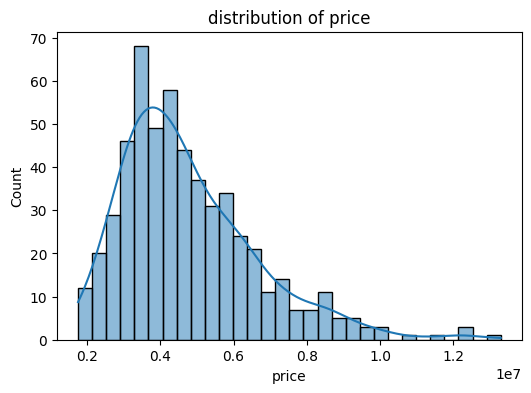

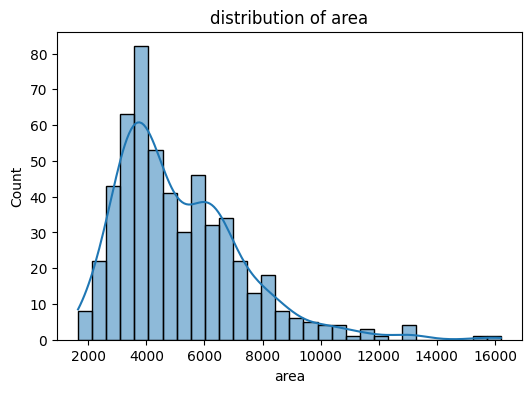

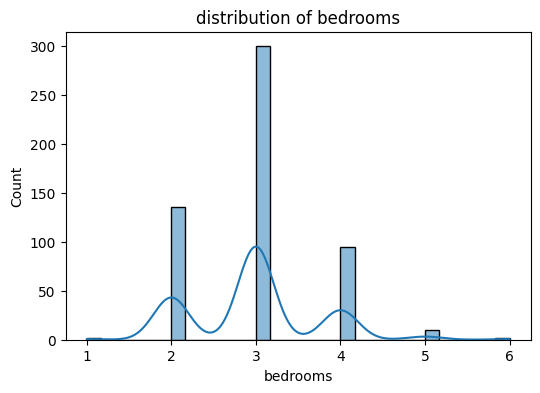

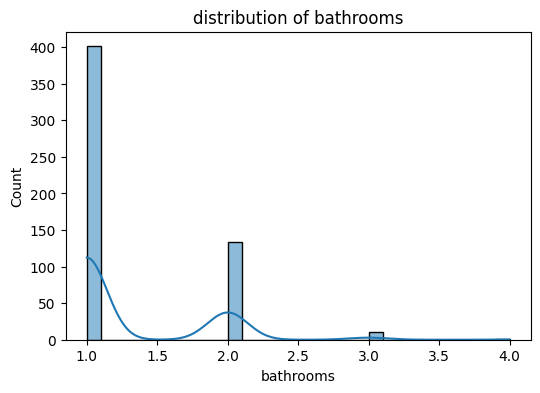

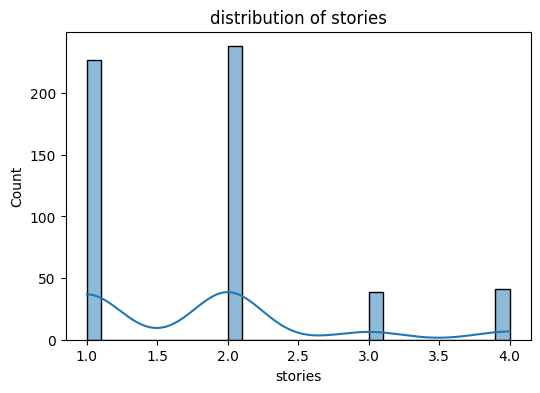

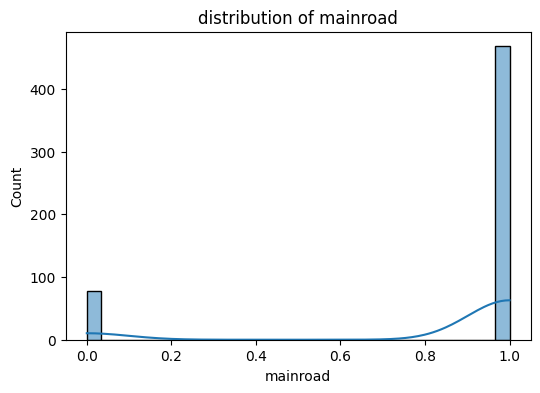

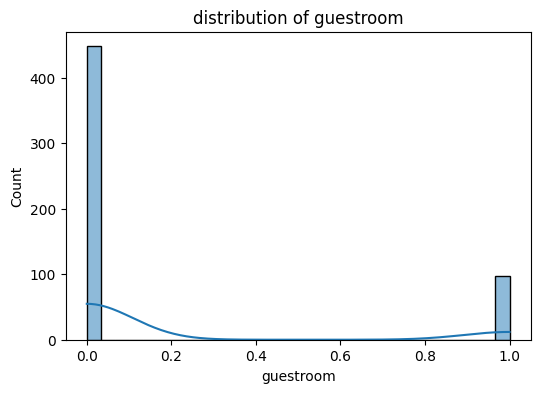

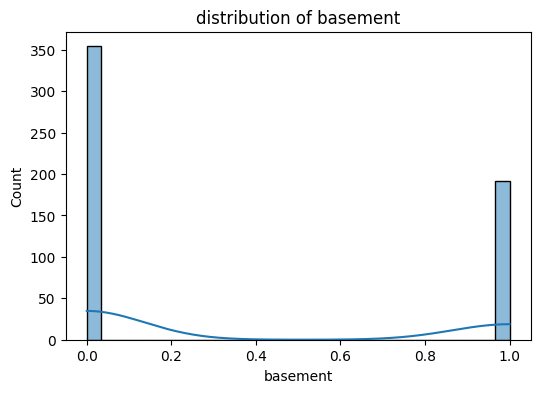

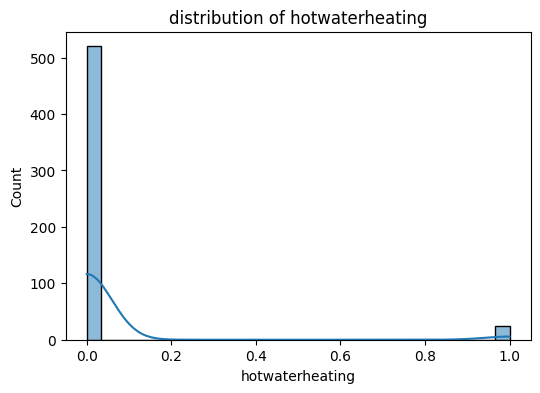

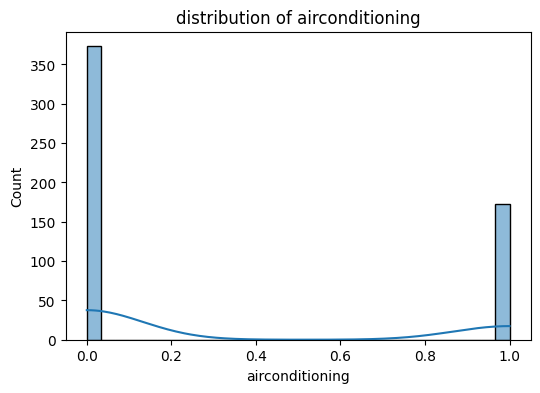

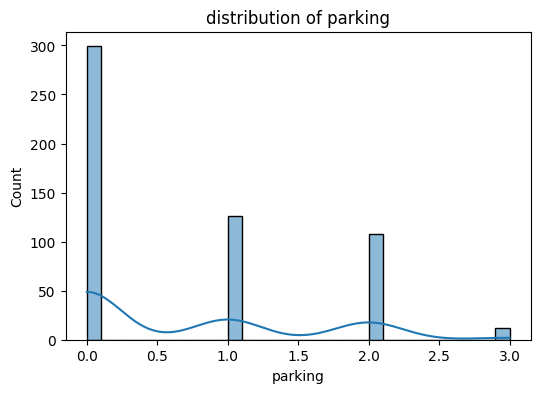

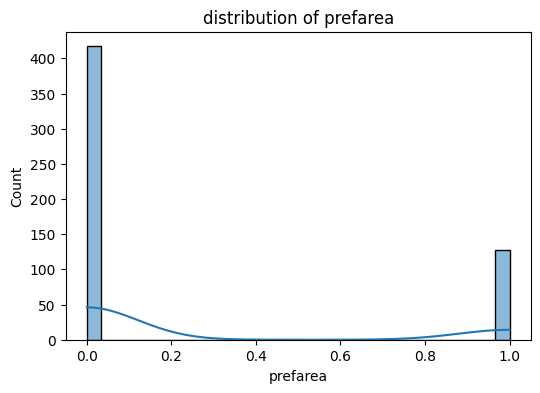

In [90]:
num_columns=df.select_dtypes(include=np.number).columns
for col in num_columns:
  plt.figure(figsize=(6,4))
  sns.histplot(df[col],kde=True,bins=30)
  plt.title(f"distribution of {col}")
  plt.show()

In [91]:
"""
Insights:

The price distribution is right skewed with a longer tail towards higher values.
Most houses are priced between the range 2 million to 6 million, with very few houses above 10 million
This indicates that these very few high value homes act as outlier thereby stretching the upper range.

Area distribution is similar to that of price, it is right skewed as well. Many houses have an area in the range 3,000 to 6,000 sq ft. There are few very large houses that act as outliers

Most of the houses have 3 bedrooms, followed by 2 and then 4.
The distrubution graph indicates very few houses with 1,5 or 6 bedrooms showing that most of the houses are moderate-sized family homes, and very few luxury homes

when it comes to Bathroom distribution, most of  the houses have 1 bathroom followed by 2 and then 3 bathrooms. very few houses have more than 1 bathroom,
Suggesting that most of the houses are small-to-moderate sized, and there are very few luxury houses.

Stories distribution:
Most of the houses have 1 or 2 stories, this pattern alligns with common housing patterns in residential areas. there are very few houses with 4 or 3 stories

Parking distribution:
The graph indicates that most houses do not have parking space while few have 1-2 parking spots. houses with 3 parking space is rare.
This suggests that most houses are small-to-moderate range houses that do not offer a dedicated parking space.

The dataset is dominated by mid-sized, affordable houses. luxury houses are quite rare.

"""

'\nInsights:\n\nThe price distribution is right skewed with a longer tail towards higher values.\nMost houses are priced between the range 2 million to 6 million, with very few houses above 10 million\nThis indicates that these very few high value homes act as outlier thereby stretching the upper range.\n\nArea distribution is similar to that of price, it is right skewed as well. Many houses have an area in the range 3,000 to 6,000 sq ft. There are few very large houses that act as outliers\n\nMost of the houses have 3 bedrooms, followed by 2 and then 4.\nThe distrubution graph indicates very few houses with 1,5 or 6 bedrooms showing that most of the houses are moderate-sized family homes, and very few luxury homes\n\nwhen it comes to Bathroom distribution, most of  the houses have 1 bathroom followed by 2 and then 3 bathrooms. very few houses have more than 1 bathroom,\nSuggesting that most of the houses are small-to-moderate sized, and there are very few luxury houses.\n\nStories dis

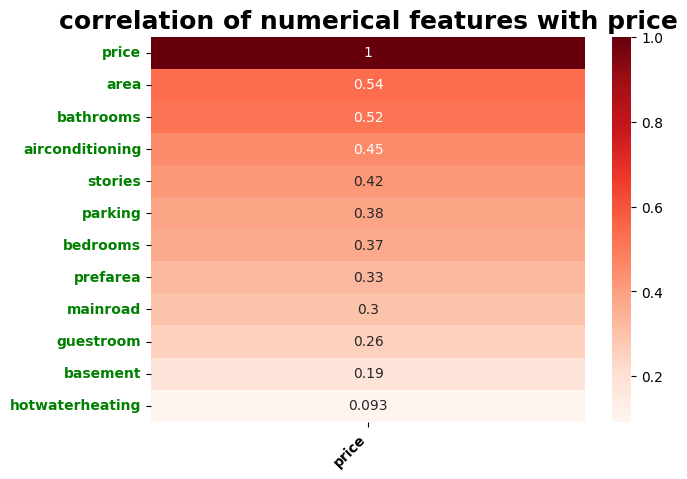

In [92]:
#correlation of numerical features with price

num=df.select_dtypes(exclude='object')
correlated_num=num.corr()

corr_price=correlated_num[['price']].sort_values(by='price',ascending=False)

plt.figure(figsize=(7,5))
sns.heatmap(corr_price, annot=True, cmap="Reds",cbar=True)

plt.title("correlation of numerical features with price", weight='bold', fontsize=18)
plt.xticks(rotation=45,ha='right',weight='bold')
plt.yticks(weight='bold',color='green',rotation=0)
plt.show()

In [93]:
"""
Insights on heatmap for correlation of numerical features with price:

The heatmap indicates that the key divers of price are :
Area, airconditionings, stories, bathrooms parking, with area being the strongest predictor of price.
Bedrooms, parking, guestroom and prefarea indicate moderate positive correlation with price.
Furnishingstatus_furnished, basement, hotwaterheating, furnishingstatus_semi-furnished indicate weak postive correlation with price indicatin that they do not have significant influence on price.
Furnishingstatus_unfurnished and furnishingstatus show negative correlation with price, meaning houses with no furnishing tend to be cheaper.

"""

'\nInsights on heatmap for correlation of numerical features with price:\n\nThe heatmap indicates that the key divers of price are :\nArea, airconditionings, stories, bathrooms parking, with area being the strongest predictor of price. \nBedrooms, parking, guestroom and prefarea indicate moderate positive correlation with price.\nFurnishingstatus_furnished, basement, hotwaterheating, furnishingstatus_semi-furnished indicate weak postive correlation with price indicatin that they do not have significant influence on price.\nFurnishingstatus_unfurnished and furnishingstatus show negative correlation with price, meaning houses with no furnishing tend to be cheaper.\n\n'

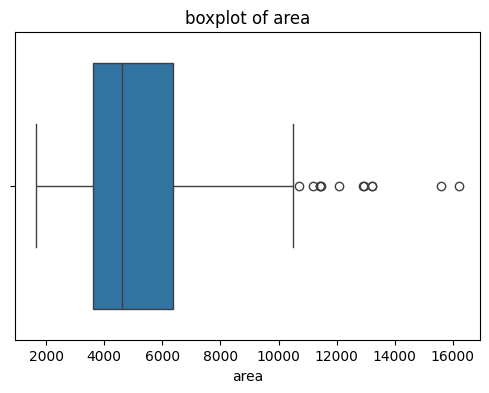

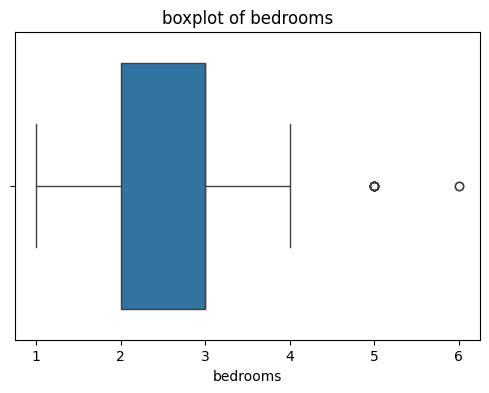

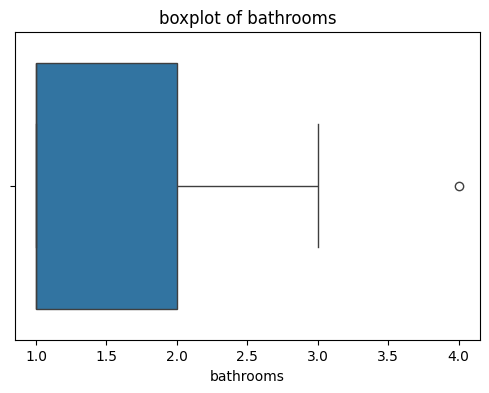

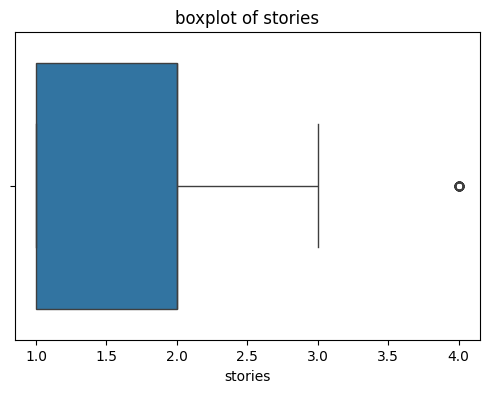

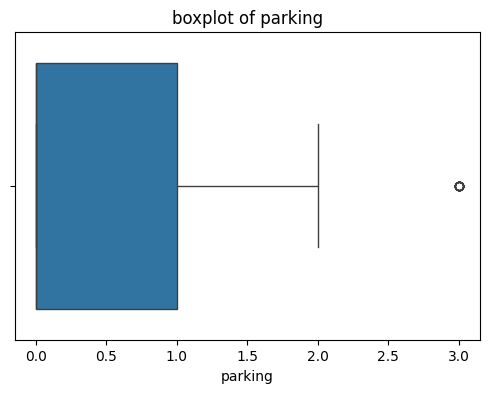

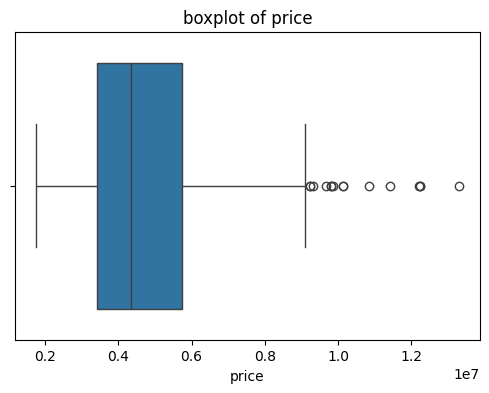

In [94]:
#detecting outliers

outlier_detect=['area', 'bedrooms','bathrooms','stories','parking','price']
for col in outlier_detect:
  plt.figure(figsize=(6,4))
  sns.boxplot(x=df[col])
  plt.title(f"boxplot of {col}")
  plt.show()

In [95]:
"""
PARKING: The distribution is skewed towards low parking avalability. the outliers exist at 3 parking spaces, meaning very few houses provide that many parking.
STORIES: Most houses have 1-3 stories. there exists a small outlier at 4 stories, infdicating rare multi story buildings.
BATHROOMS; Majority of the houses have 1-3 bathrooms. outliers appear at 4 bathrooms, which is rare.
BEDROOMS: Most of the houses have 2-3 bedrooms, outliers appear at 5-6, which represent large and premium housess.
          This could indicate that most houses are family-sized and there very few luxury homes which influence the overall price.
AREA: Most properties fall between 2,000-10,000 sq. ft. outliers appear in the  range 12,000-16,000 sq. ft.
      This sugggests that market is domminated by mid sized houses, but very few "high-value" luxury houses which skew the distribution.
PRICE:Most houses arre between 2M-9M. manny outliers lie above 10M, indicating presence of luxury properties.
      Majority of the houses are mid priced, but few high-value luxury houses that skew the distribution.


Uutliers exist in bathroom, bedroom, stories, parking, price and area distribution, there by inflating the upper range. This indicates that these distributions need outlier handling else these values may distort regression results.
Most houses are affordable family-sized pproperties.
Luxury homes are rare  but they influence the overall price prediction significantly.

"""

'\nPARKING: The distribution is skewed towards low parking avalability. the outliers exist at 3 parking spaces, meaning very few houses provide that many parking.\nSTORIES: Most houses have 1-3 stories. there exists a small outlier at 4 stories, infdicating rare multi story buildings.\nBATHROOMS; Majority of the houses have 1-3 bathrooms. outliers appear at 4 bathrooms, which is rare.\nBEDROOMS: Most of the houses have 2-3 bedrooms, outliers appear at 5-6, which represent large and premium housess.\n          This could indicate that most houses are family-sized and there very few luxury homes which influence the overall price.\nAREA: Most properties fall between 2,000-10,000 sq. ft. outliers appear in the  range 12,000-16,000 sq. ft.\n      This sugggests that market is domminated by mid sized houses, but very few "high-value" luxury houses which skew the distribution.\nPRICE:Most houses arre between 2M-9M. manny outliers lie above 10M, indicating presence of luxury properties.\n     

before outlier removal:  (545, 3)
price:  lower=-35000.0, upper=9205000.0
area:  lower=-604.875, upper=10468.125
bedrooms:  lower=0.5, upper=4.5
after removal of outliers:  (506, 3)


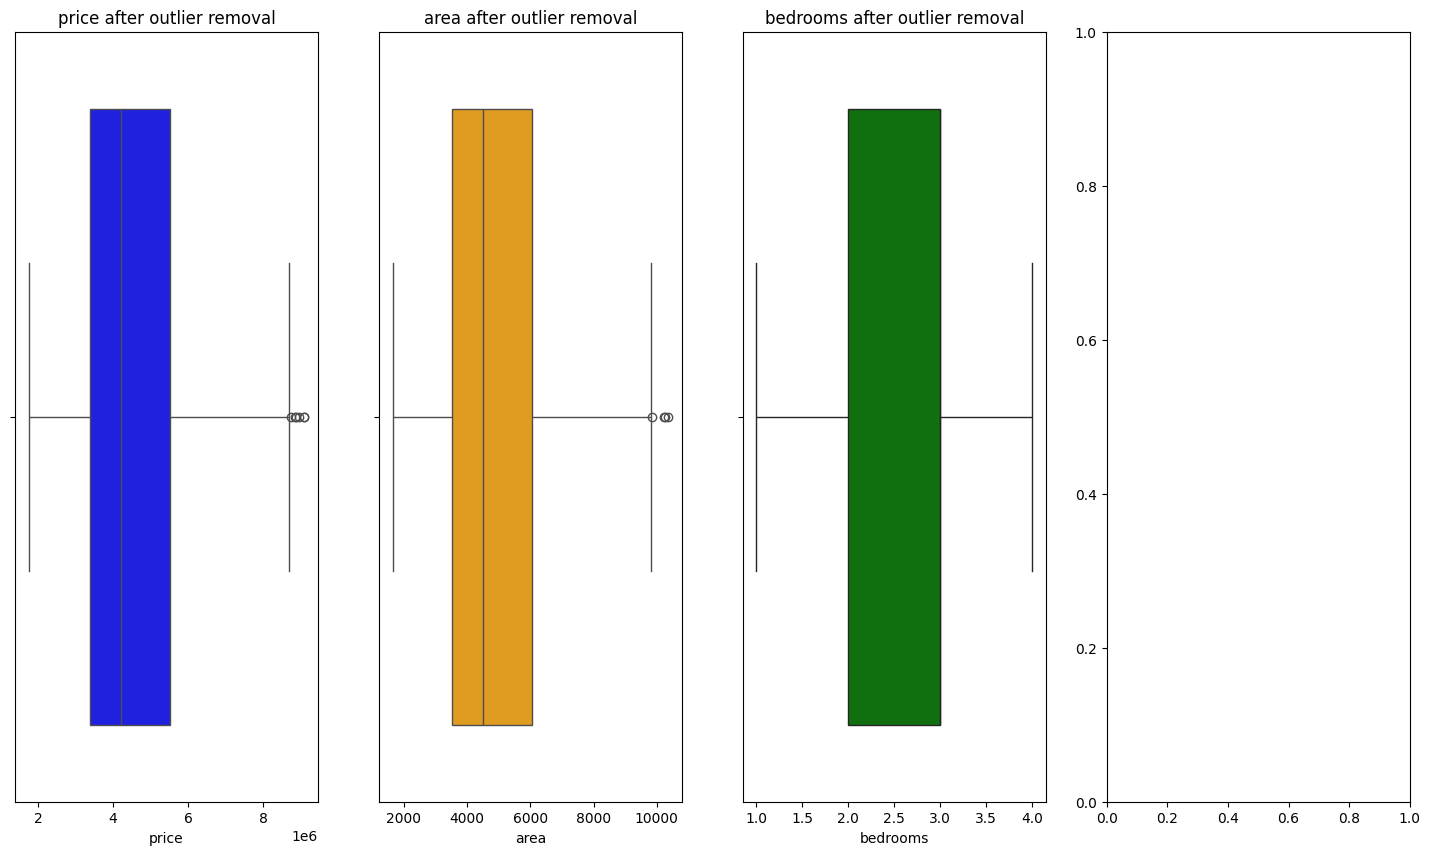

In [96]:
#outlier handling for price and area and bedrooms

def remove_outliers(data,column):
  Q1=data[column].quantile(0.25)
  Q3=data[column].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR

  print(f"{column}:  lower={lower_bound}, upper={upper_bound}")

  return data[(data[column]>=lower_bound) & (data[column]<=upper_bound)]

print("before outlier removal: ", df[['price','area','bedrooms']].shape)

df=remove_outliers(df, "price")
df=remove_outliers(df, "area")
df=remove_outliers(df, "bedrooms")


print("after removal of outliers: ", df[['price','area','bedrooms']].shape)

fig, axes=plt.subplots(1,4,figsize=(18,10))

sns.boxplot(x=df["price"], ax=axes[0],color="blue")
axes[0].set_title("price after outlier removal")

sns.boxplot(x=df["area"], ax=axes[1],color="orange")
axes[1].set_title("area after outlier removal")

sns.boxplot(x=df["bedrooms"], ax=axes[2],color="green")
axes[2].set_title("bedrooms after outlier removal")



plt.show()


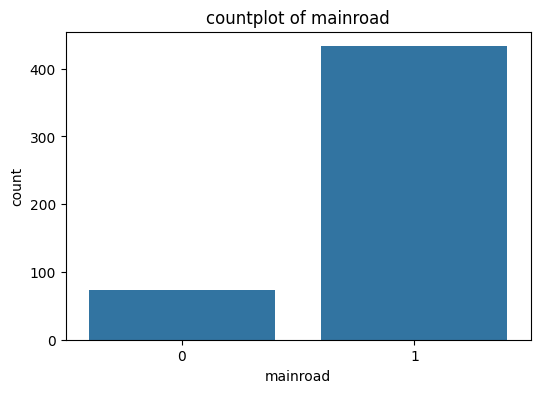

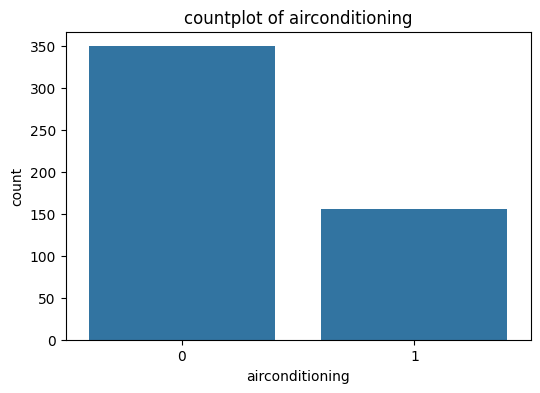

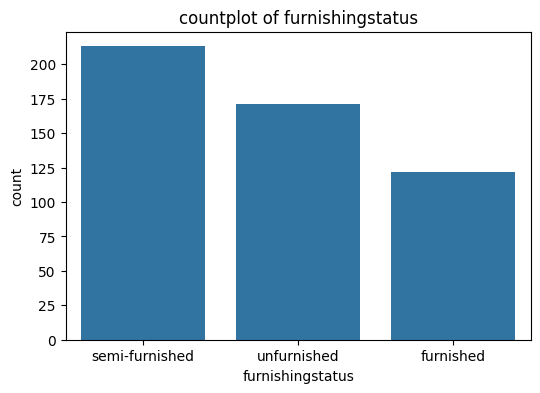

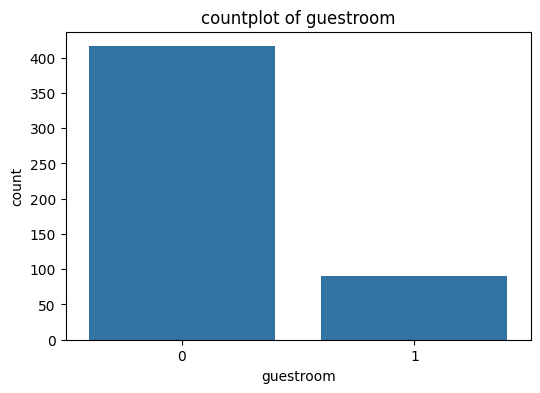

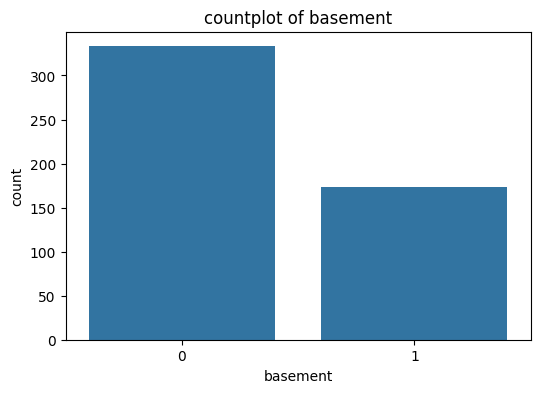

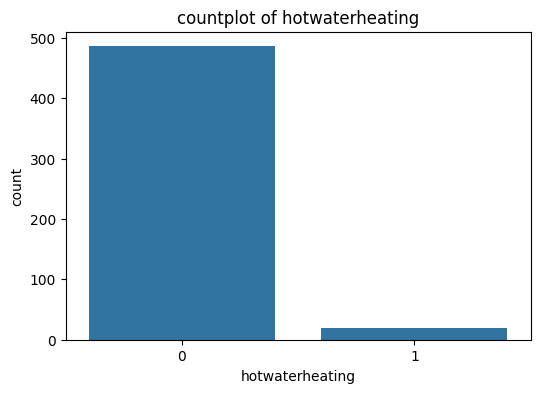

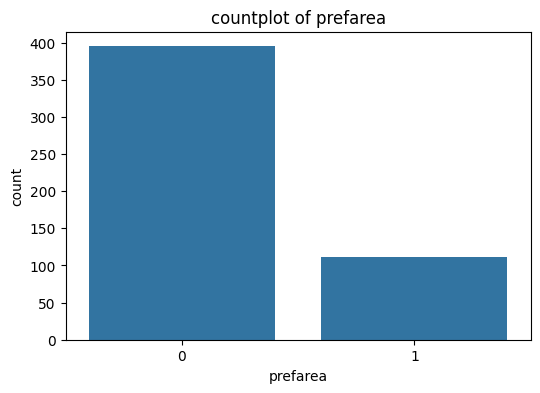

In [97]:
#plotting countplots for categorical features such as  mainroad, airconditioning, furnishingstatus, guestroom ,  basement,  hotwaterheating, prefarea

categorical_cols = ['mainroad','airconditioning','furnishingstatus','guestroom','basement','hotwaterheating','prefarea']
for col in categorical_cols:
  plt.figure(figsize=(6,4))
  sns.countplot(x=df[col])
  plt.title(f"countplot of {col}")
  plt.show()

In [98]:
"""
Countplot of mainroad:
The graph suggests that most of the houses lie near the mainroad, showing better accessibility to public transport, amenities and businesses.
Around 100 houses do not lie by the mainroad.
The dataset is dominated by houses that lie near the mainroad.


countplot of air conditioning:
Most of the houses donot have air conditioning, while houses that offer this amenity are very few in number.This could be because air conditioners are often expensive.

Countplot of furnishing status:
Semi furnished houses are higher in number, followed by unfurnished ones and then fully furnished ones.
This could indicate that semi furnished homes might strike a balance between cost and convenience.
Fully furnished houses are lower in number, this could be because they are usually more expensive. many buyers might avoid them to cut costs.
The semi furnished houses are popular in rental markets, especially for working professionals or students because theey provide essentials without high upfront costs.

countplot of guestrooms:
Majority of the houses donot have guestrooms. only around a hundred houses have guestrooms.

Countplot of basement:
Houses without basements(over 400 houses) are more in number than houses with basements(over 150)

Countplot of hot water heater:
Many houses donot offer hot water heater.
Less than hundred houses have this amenity.

Countplot of prefarea:
Graph of preferred Area shows that most of the houses (over 400 houses) are not located in a prefered locality. there are very few houses that are situated in a preferred (or prime neighbourhood with good amneties).

"""

'\nCountplot of mainroad:\nThe graph suggests that most of the houses lie near the mainroad, showing better accessibility to public transport, amenities and businesses.\nAround 100 houses do not lie by the mainroad.\nThe dataset is dominated by houses that lie near the mainroad.\n\n\ncountplot of air conditioning:\nMost of the houses donot have air conditioning, while houses that offer this amenity are very few in number.This could be because air conditioners are often expensive.\n\nCountplot of furnishing status:\nSemi furnished houses are higher in number, followed by unfurnished ones and then fully furnished ones.\nThis could indicate that semi furnished homes might strike a balance between cost and convenience.\nFully furnished houses are lower in number, this could be because they are usually more expensive. many buyers might avoid them to cut costs.\nThe semi furnished houses are popular in rental markets, especially for working professionals or students because theey provide ess

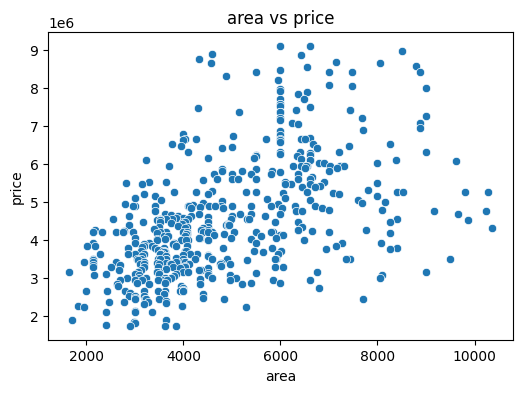

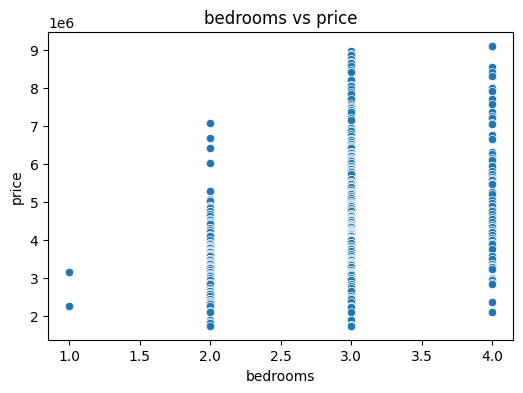

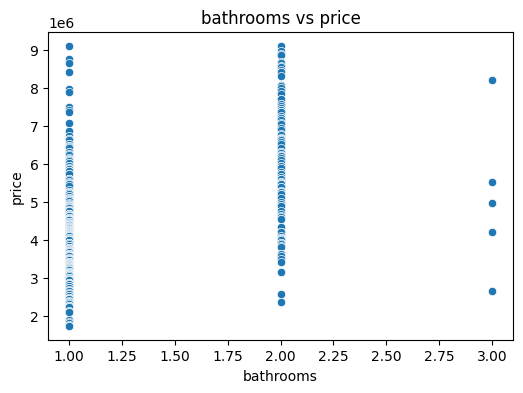

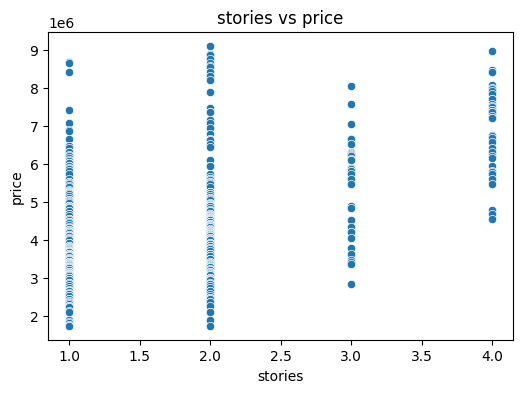

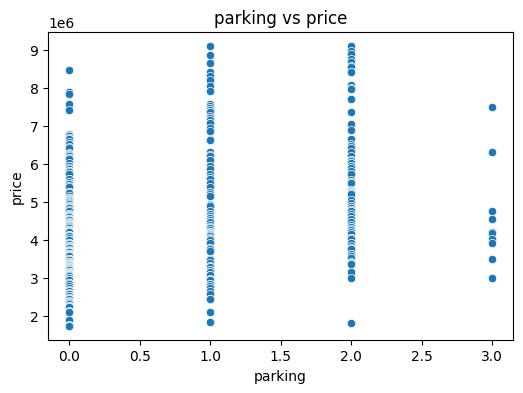

In [99]:
#relationship between numeric features and price

numeric_features=['area', 'bedrooms','bathrooms','stories','parking']
for feature in numeric_features:
  plt.figure(figsize=(6,4))
  sns.scatterplot(data=df, x=feature,y="price")
  plt.title(f"{feature} vs price")
  plt.show()


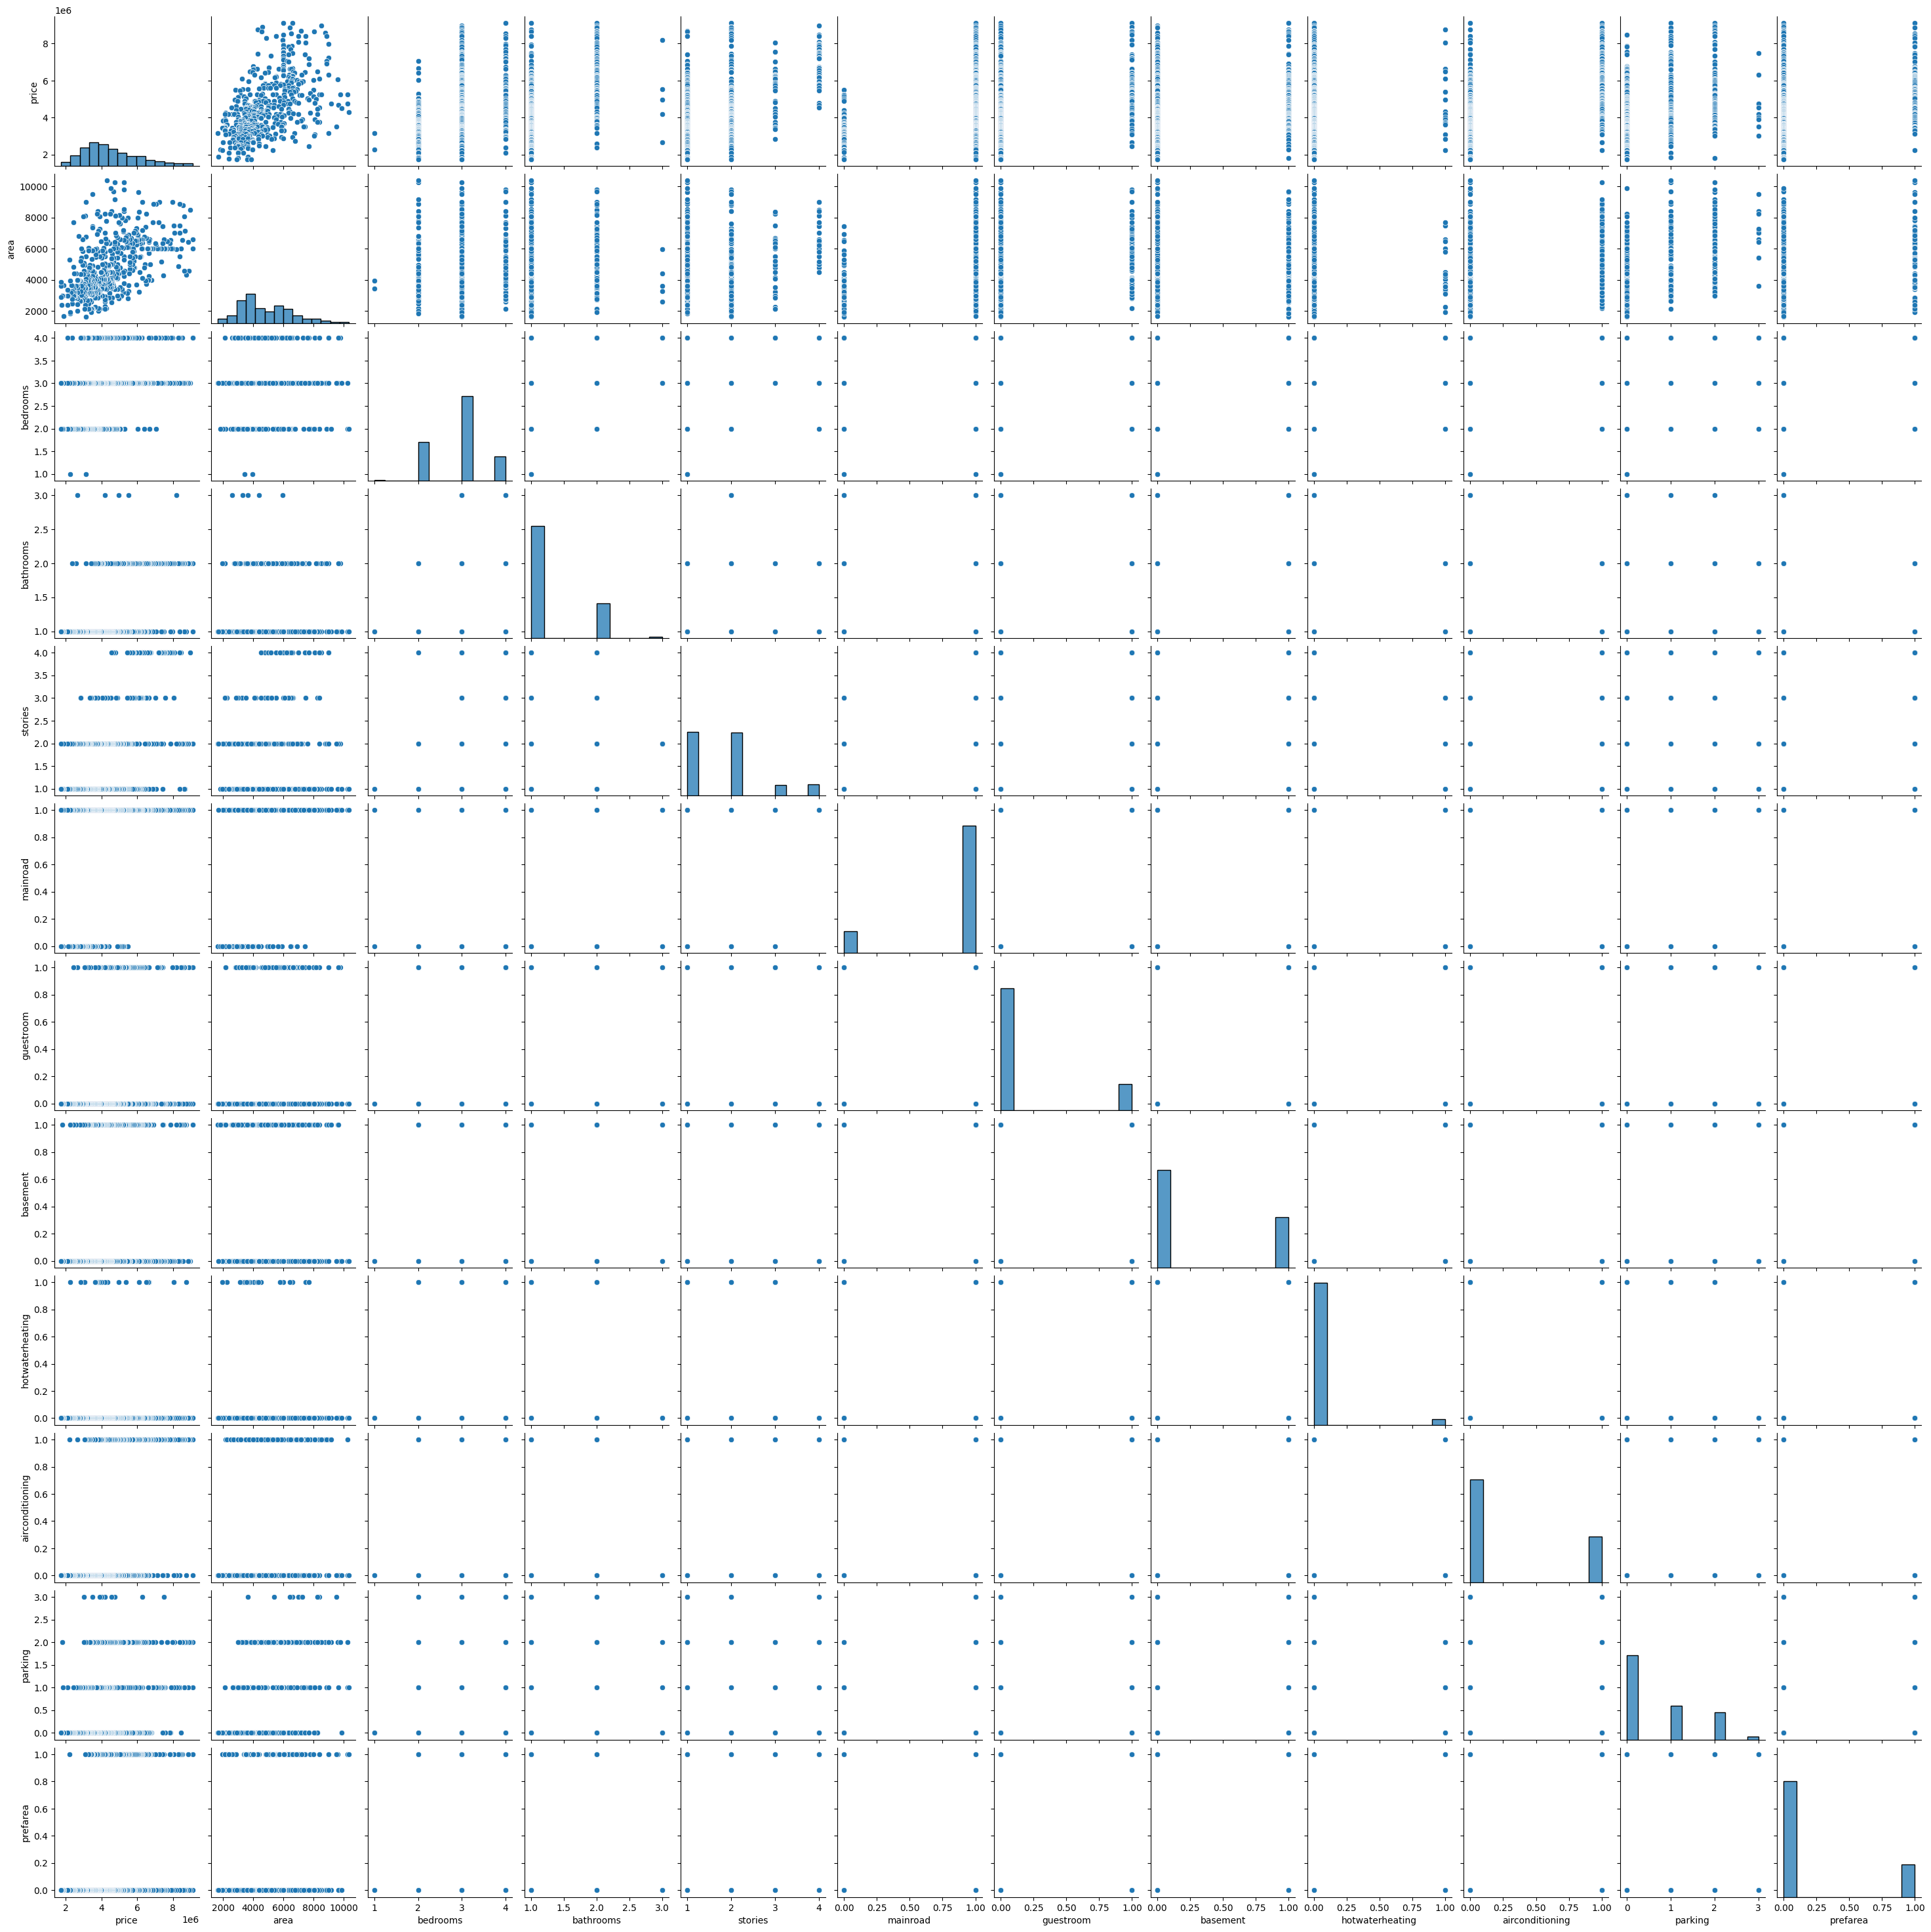

In [100]:
#numerical relationships
sns.pairplot(df[num_columns])
plt.show()

/tmp/ipython-input-3153369528.py:3: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


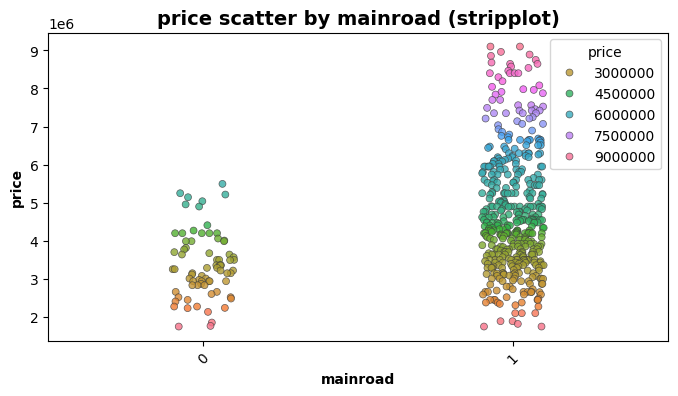

/tmp/ipython-input-3153369528.py:3: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


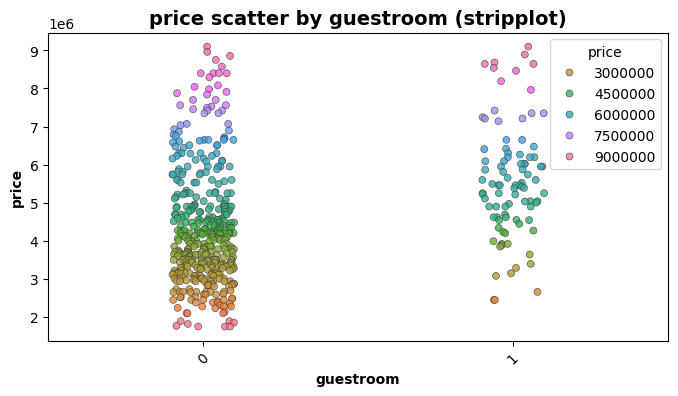

/tmp/ipython-input-3153369528.py:3: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


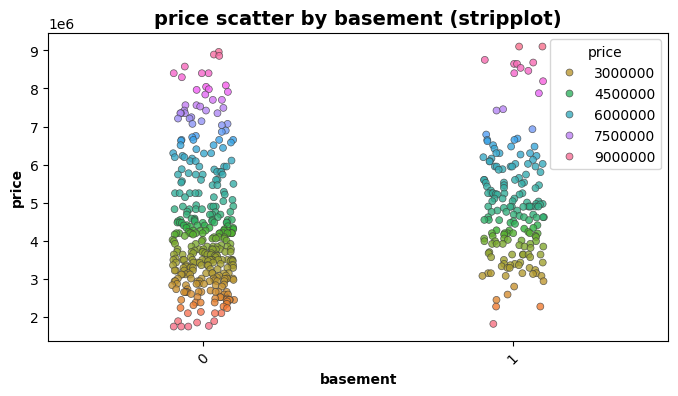

/tmp/ipython-input-3153369528.py:3: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


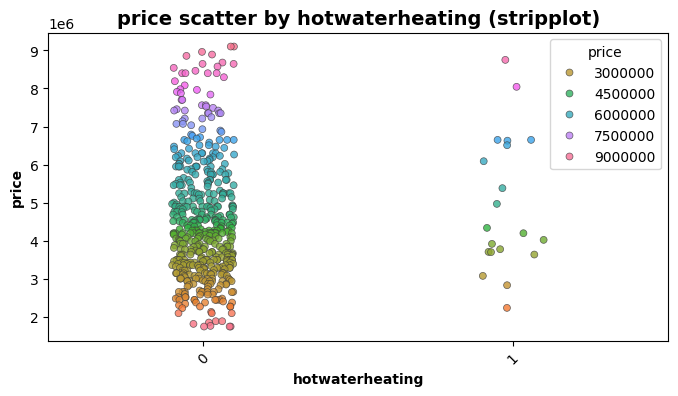

/tmp/ipython-input-3153369528.py:3: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


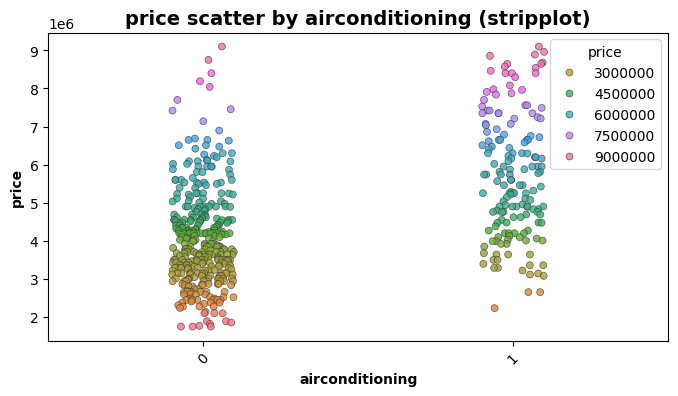

/tmp/ipython-input-3153369528.py:3: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


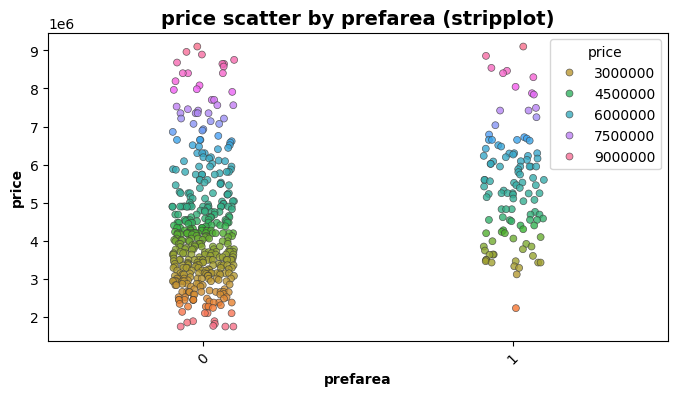

/tmp/ipython-input-3153369528.py:3: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


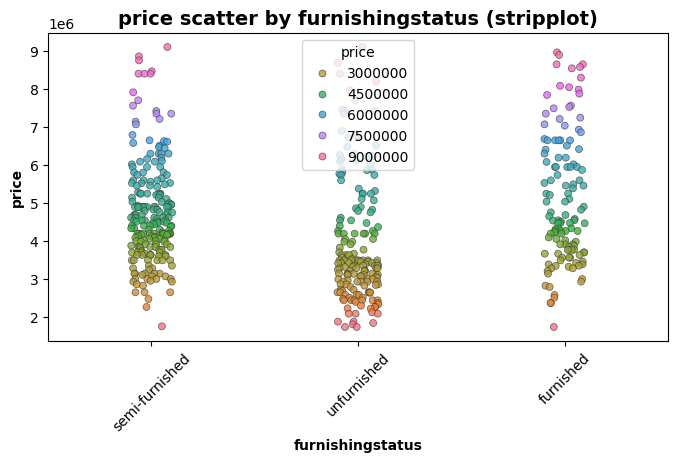

In [101]:
for col in cat_cols:
  plt.figure(figsize=(8,4))
  sns.stripplot(
      x=col,y='price',data=df,
      jitter=True,alpha=0.8,hue='price',palette='husl',edgecolor='gray',linewidth=0.5
  )
  plt.title(f"price scatter by {col} (stripplot)", fontsize=14,weight='bold')
  plt.xlabel(col,weight='bold')
  plt.ylabel('price',weight='bold')
  plt.xticks(rotation=45)
  plt.show()

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df = pd.get_dummies(df, drop_first=False)
df['furnishingstatus'] = df.apply(
    lambda row: 'semi-furnished' if row['furnishingstatus_semi-furnished'] == 1
    else ('unfurnished' if row['furnishingstatus_unfurnished'] == 1 else 'furnished'),
    axis=1
)

X = df[numeric_features].drop("price", axis=1, errors="ignore")  # drop target if exists
X = add_constant(X)

vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)
#dont use

     Feature        VIF
0      const  26.518237
1       area   1.168003
2   bedrooms   1.331289
3  bathrooms   1.195664
4    stories   1.298244
5    parking   1.154041


In [103]:
"""
Insights on VIF :
Indicates very low multicolinearity among numerical predictors.
Linear models can safely be used.
No definite need to drop or combine features.
"""

'\nInsights on VIF :\nIndicates very low multicolinearity among numerical predictors.\nLinear models can safely be used.\nNo definite need to drop or combine features.\n'

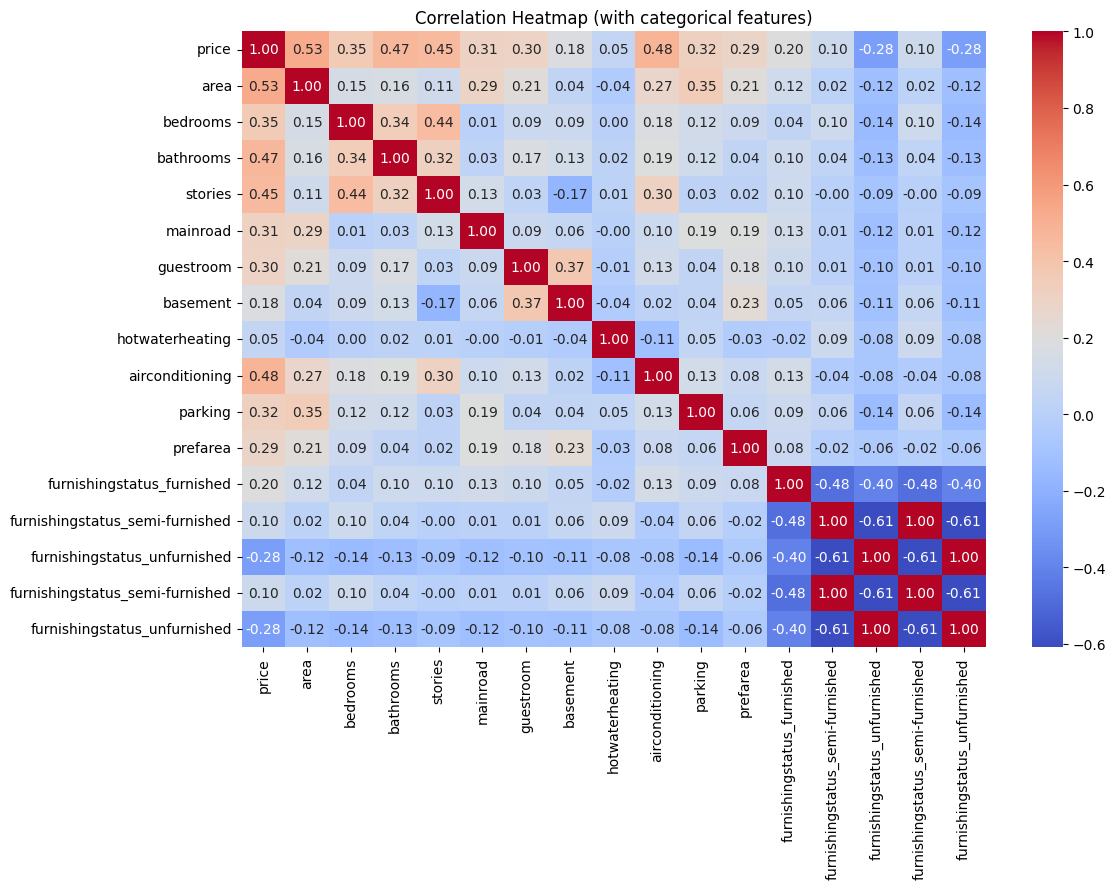

In [104]:

df_encoded = df.copy()

df_encoded = pd.get_dummies(df_encoded, drop_first=True)

plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (with categorical features)")
plt.show()


In [105]:
"""

1 CORRELATION OF ALL FEATURES INCLUDING CATEGORICAL:

1.1 CORRELATION OF ALL FEATURES WITH PRICE:


area, bathrooms, airconditioning , stories, bedrooms, parking show high corrrelation with price.
Larger area, more bathrooms and bedrooms increases price, which is expected.
More bedrooms moderately increase the price.
Most houses are near the mainrooad, and the houses near the mainroad are slighly costlier.
Houses in preferred area also influence price.
Guestroom availability also increases house price slightly.
Unfurnished houses have lower prices, semi furnished houses have more market demand likely because it offers more essentials with lower cost.
While basement and hotwaterheating have minimal effect on price.

1.2 CORRELATION BETWEEN FEATURES:
More bedrooms usually means more bathrooms, hence number of bathrooms often increase with number of bedrooms
Semi furnished houses and unfurnished houses show negative correlation
Other factors show low correlation, meaning they contibute unique information and are independent.

Hence we can say that the key divers of price are :
area
bathrooms
stories
airconditionings
parking
bedrooms

Insights:
Features like basement and hotwaterheating have negligible impact hence they mau be less important in feature prediction.
Semi furnished houses have slightly more market demand than unfurnished houses.
Buyers pay more for more area, facilities and location.
"""

'\n\n1 CORRELATION OF ALL FEATURES INCLUDING CATEGORICAL:\n\n1.1 CORRELATION OF ALL FEATURES WITH PRICE:\n\n\narea, bathrooms, airconditioning , stories, bedrooms, parking show high corrrelation with price.\nLarger area, more bathrooms and bedrooms increases price, which is expected.\nMore bedrooms moderately increase the price.\nMost houses are near the mainrooad, and the houses near the mainroad are slighly costlier.\nHouses in preferred area also influence price.\nGuestroom availability also increases house price slightly.\nUnfurnished houses have lower prices, semi furnished houses have more market demand likely because it offers more essentials with lower cost.\nWhile basement and hotwaterheating have minimal effect on price.\n\n1.2 CORRELATION BETWEEN FEATURES:\nMore bedrooms usually means more bathrooms, hence number of bathrooms often increase with number of bedrooms\nSemi furnished houses and unfurnished houses show negative correlation\nOther factors show low correlation, mea

In [106]:
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [107]:
df_encoded=df.copy()

#encoding
for col in df_encoded.columns.drop("price"):
  if df_encoded[col].dtype=='object' or len(df_encoded[col].unique())<=10:
    df_encoded[col]=LabelEncoder().fit_transform(df_encoded[col].astype(str))



df_encoded['area_stories']=df_encoded['area']*df_encoded['stories']
df_encoded['bed_bath']=df_encoded['bedrooms']*df_encoded['bathrooms']
df_encoded['area_bedrooms']=df_encoded['area']*df_encoded['stories']
df_encoded['bath_bed_ratio']=df_encoded['bathrooms']/(df_encoded['bedrooms']+1)
df_encoded['area_per_story']=df_encoded['area']/(df_encoded['stories']+1)


x=df_encoded.drop("price", axis=1)
y=df_encoded['price']



scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

x_train, x_test, y_train,y_test=train_test_split(x_scaled, y, test_size=0.2, random_state=42)

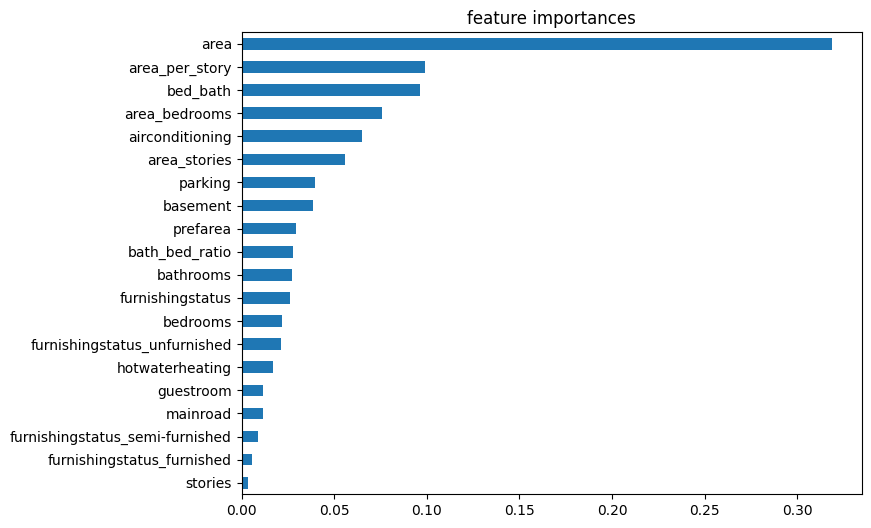

In [108]:
#checking feature importance

model= RandomForestRegressor()
model.fit(x_train,y_train)

feature_names=x.columns

importances=pd.Series(model.feature_importances_, index=feature_names)
importances.sort_values().plot(kind='barh',figsize=(8,6))

plt.title("feature importances")
plt.show()

In [109]:
#LINEAR REGRESION
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)
y_prediction=model.predict(x_test)
print("R2 Score:", r2_score(y_test, y_prediction))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_prediction)))

R2 Score: 0.7193463311444288
RMSE: 919252.386997863


In [110]:
"""
INSIGHTS ON LINEAR REGRESSION PERFORMANCE:

The model explain 72% of variability in house prices.
This indicates linear regression captures most of the linear relationships in the dataset.
The value of MSE shows that, on average the predicted price deviates by 0.92 million. which is reasonable for high priced houses.

"""

'\nINSIGHTS ON LINEAR REGRESSION PERFORMANCE:\n\nThe model explain 72% of variability in house prices.\nThis indicates linear regression captures most of the linear relationships in the dataset.\nThe value of MSE shows that, on average the predicted price deviates by 0.92 million. which is reasonable for high priced houses.\n\n'

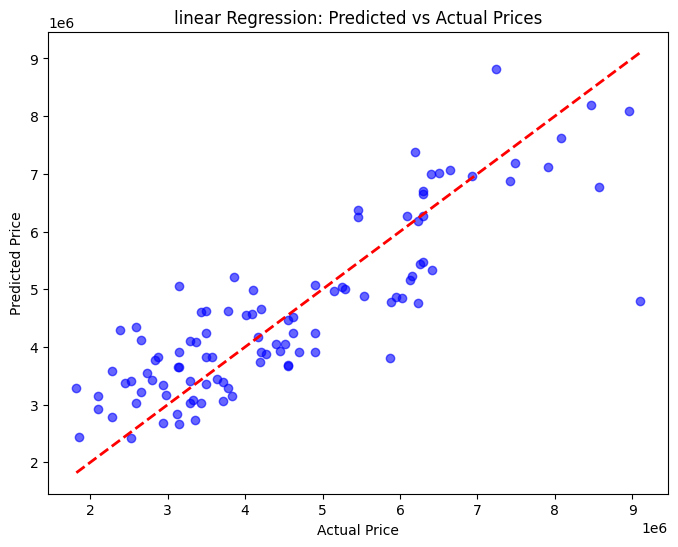

In [111]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_prediction, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("linear Regression: Predicted vs Actual Prices")
plt.show()


In [112]:
"""
Scatterplot shows a generally positive linear trend, meaning the model is learning the relationship between features and price.
There's a noticable spread around the red line.
Some higher-priced houses are underestimated, showing bias in high-value predictions.
Overall, the model performs decently but with variance in predictions.
"""

"\nScatterplot shows a generally positive linear trend, meaning the model is learning the relationship between features and price.\nThere's a noticable spread around the red line.\nSome higher-priced houses are underestimated, showing bias in high-value predictions.\nOverall, the model performs decently but with variance in predictions.\n"

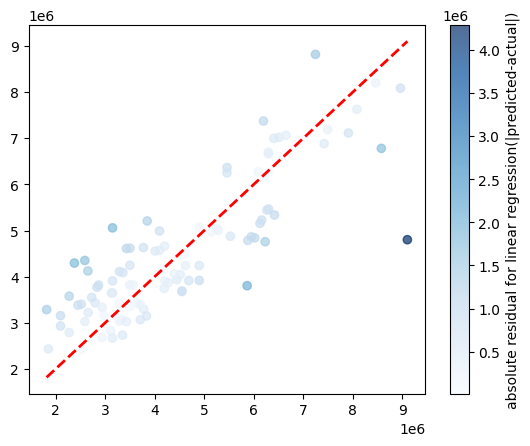

In [113]:
residuals=y_prediction-y_test
scatter=plt.scatter(y_test,y_prediction,c=np.abs(residuals),cmap='Blues',alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)

cbar=plt.colorbar(scatter)
cbar.set_label("absolute residual for linear regression(|predicted-actual|)")

In [114]:
#K-FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score, KFold

model=LinearRegression()

kf=KFold(n_splits=5,shuffle=True, random_state=42)

rmse_scores=-cross_val_score(model, df.drop('price',axis=1), df['price'], scoring='neg_root_mean_squared_error', cv=kf)

r2_scores=cross_val_score(model, df.drop('price',axis=1), df['price'], scoring='r2', cv=kf)

print(f"cross validated RMSE score: {rmse_scores}")
print(f"mean rmse score: {np.mean(rmse_scores):.4f}")
print(f"cross validated R2 score: {r2_scores}")
print(f"mean r2 score: {np.mean(r2_scores):.4f}")

cross validated RMSE score: [ 953345.50693898 1029846.72515658  934103.83659915  948612.84683083
  866831.6897897 ]
mean rmse score: 946548.1211
cross validated R2 score: [0.69814259 0.64538406 0.46523441 0.61837812 0.68208832]
mean r2 score: 0.6218


In [115]:
"""
Insights for cross validation performance:

The mean RMSE indicates that the predictions are off by around 0.95 million units of price.
The variation among the folds suggests that the model's performance is sensitive to different splits of the datset.

The r2 shows that on average the model explains about 62% of price variability.

The model generalization is moderate as it captures good portion of variability.
The ressults suggest that the folds  may have outliers or skewed price distributions.

"""

"\nInsights for cross validation performance:\n\nThe mean RMSE indicates that the predictions are off by around 0.95 million units of price.\nThe variation among the folds suggests that the model's performance is sensitive to different splits of the datset.\n\nThe r2 shows that on average the model explains about 62% of price variability.\n\nThe model generalization is moderate as it captures good portion of variability.\nThe ressults suggest that the folds  may have outliers or skewed price distributions.\n\n"

In [116]:
#RIDGE REGRESSION
alphas=[0.01,0.1,1,10,50,100,200]
ridge_cv=RidgeCV(alphas=alphas,store_cv_values=True)
ridge_cv.fit(x_train,y_train)
y_prediction_ridge=ridge_cv.predict(x_test)

mse=mean_squared_error(y_test,y_prediction_ridge)
r2=r2_score(y_test,y_prediction_ridge)

print(f"ridgeCV- MSE: {mse: .2f}")
print(f"ridgeCV- R2: {r2: .2f}")
print(f"best alpha: {ridge_cv.alpha_}")

ridgeCV- MSE:  894983045776.55
ridgeCV- R2:  0.70
best alpha: 50.0


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


In [117]:
"""
INSIGHTS ON RIDDGE REGRESSION PERFORMANCE:

The MSE is large (894983045776.55), which is expeccted due to the large scale of prices.
The R2 value (0.70), suggests that the  model explains 70% of the variance in the target variable.
this indicates moderate-to-good predictive performance.

However, the model performance is slighly lower than Linear Regression, suggesting some fit was traded off for a more stable model and reduced variance.
Hence the model may not fit perfectly to the training data but it generalizes well to new data.
"""

'\nINSIGHTS ON RIDDGE REGRESSION PERFORMANCE:\n\nThe MSE is large (894983045776.55), which is expeccted due to the large scale of prices.\nThe R2 value (0.70), suggests that the  model explains 70% of the variance in the target variable.\nthis indicates moderate-to-good predictive performance.\n\nHowever, the model performance is slighly lower than Linear Regression, suggesting some fit was traded off for a more stable model and reduced variance.\nHence the model may not fit perfectly to the training data but it generalizes well to new data.\n'

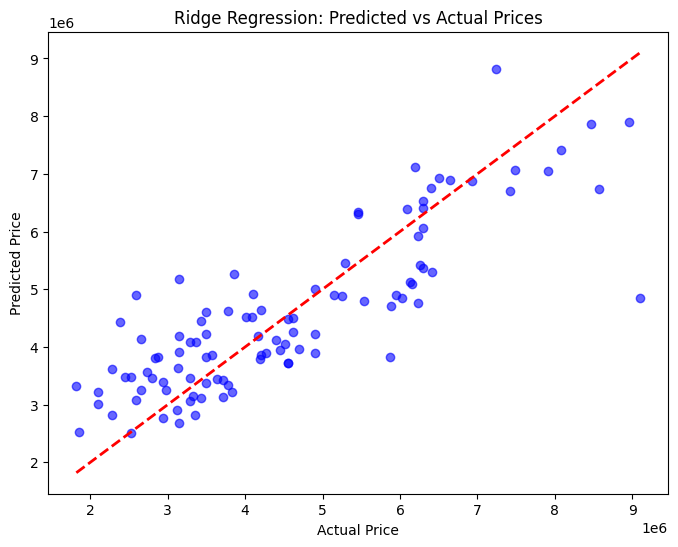

In [118]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_prediction_ridge, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Ridge Regression: Predicted vs Actual Prices")
plt.show()


In [119]:
"""
Insights on actual vs predicted price for ridge regression:

Ridge regression produces a very simiilar pattern to linear regression.
Predictions are slightly more stable than linear regression, but variance is still significant.
High priced houses are still underestimated, though slightly better controlled.
Prediction variance is not entirely solved but ridge helps generalize better.

"""

'\nInsights on actual vs predicted price for ridge regression:\n\nRidge regression produces a very simiilar pattern to linear regression.\nPredictions are slightly more stable than linear regression, but variance is still significant.\nHigh priced houses are still underestimated, though slightly better controlled.\nPrediction variance is not entirely solved but ridge helps generalize better.\n\n'

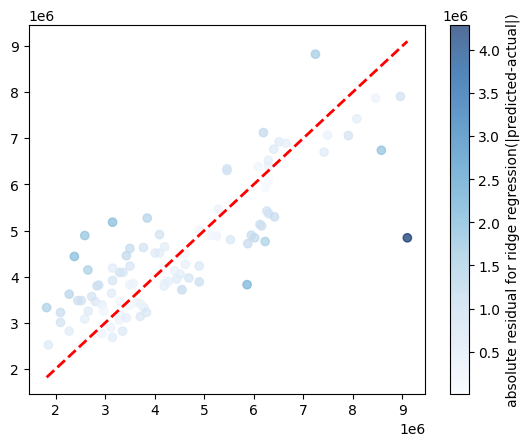

In [120]:
residuals=y_prediction-y_test
scatter=plt.scatter(y_test,y_prediction_ridge,c=np.abs(residuals),cmap='Blues',alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)

cbar=plt.colorbar(scatter)
cbar.set_label("absolute residual for ridge regression(|predicted-actual|)")

In [121]:
"""
Insights on absolute residual for Ridge regression:

The residuals are plotted with color intensity.
Darker blue points indicate larger prediction errors, mostly for higher-priced houses.
Most residuals are small for mid range values, suggesting Ridge regression handles average priced houses well.
Ridge still struggles with extreme values.
"""


'\nInsights on absolute residual for Ridge regression:\n\nThe residuals are plotted with color intensity.\nDarker blue points indicate larger prediction errors, mostly for higher-priced houses.\nMost residuals are small for mid range values, suggesting Ridge regression handles average priced houses well.\nRidge still struggles with extreme values.\n'

In [122]:
#LASSO REGRESSION
alphas=[0.001,0.005,0.01,0.05,0.1,1,10,50]
lasso_cv=LassoCV(alphas=alphas,cv=5,random_state=42,max_iter=10000)
lasso_cv.fit(x_train,y_train)

y_pred_lasso=lasso_cv.predict(x_test)
mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)

print("LassoCV - MSE: ", mse)
print("LassoCV - R2: ", r2)
print("Best alpha: ", lasso_cv.alpha_)


LassoCV - MSE:  845025410780.7434
LassoCV - R2:  0.719346178440303
Best alpha:  0.001


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160454459836.75, tolerance: 77463682092.1196
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.576e+14, tolerance: 9.608e+10
  model = cd_fast.enet_coordinate_descent(


In [123]:
"""
Insights on lasso regression performance:
The MSE value is lower than ridge, suggesting better fit to test data.
The R2 value is slightly higher than ridge, meaning that lasso is  capturing the linear patterns better.

Hence LassoCV is observed to perform slightly better than RidgeCV.

"""


'\nInsights on lasso regression performance:\nThe MSE value is lower than ridge, suggesting better fit to test data.\nThe R2 value is slightly higher than ridge, meaning that lasso is  capturing the linear patterns better.\n\nHence LassoCV is observed to perform slightly better than RidgeCV.\n\n'

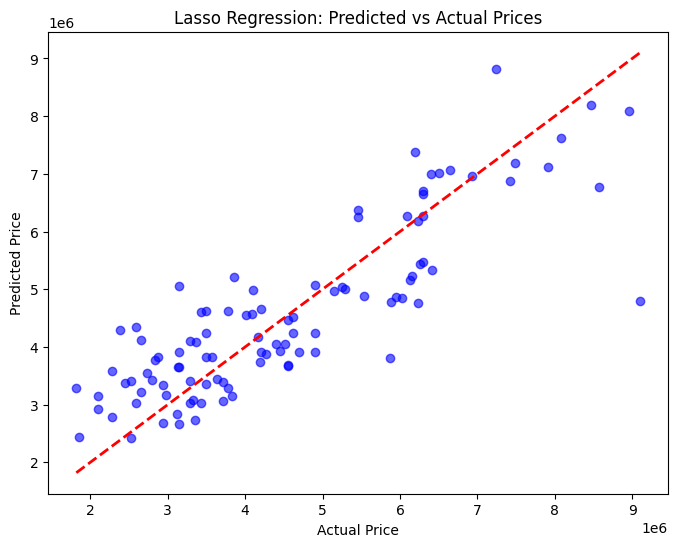

In [124]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lasso, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Lasso Regression: Predicted vs Actual Prices")
plt.show()


In [125]:
"""
Insights on actual vs predicted price for Lasso regression:

Lasso guves similar scatter distribution to linear and ridge.
Predictions align well for mid range prices but diverge for expensive houses, similar to ridge.
It has slightly more compact spread compared to linear, showing better generalization.
"""

'\nInsights on actual vs predicted price for Lasso regression:\n\nLasso guves similar scatter distribution to linear and ridge.\nPredictions align well for mid range prices but diverge for expensive houses, similar to ridge.\nIt has slightly more compact spread compared to linear, showing better generalization.\n'

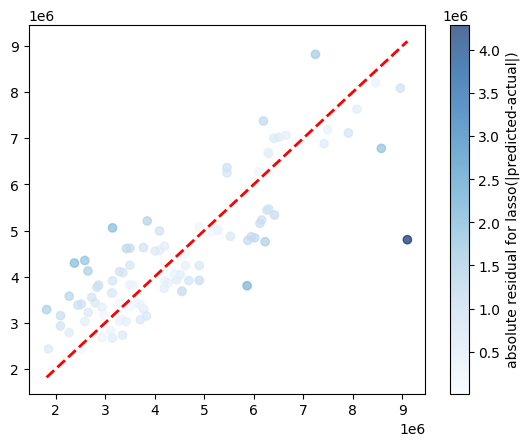

In [126]:
residuals=y_prediction-y_test
scatter=plt.scatter(y_test,y_pred_lasso,c=np.abs(residuals),cmap='Blues',alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)

cbar=plt.colorbar(scatter)
cbar.set_label("absolute residual for lasso(|predicted-actual|)")

In [127]:
"""
Insights on absolute residual for Lasso regression:

The plot is similar to that of ridge.
Most houses are predcted close to actual, but hugh value properties again show large residuals.
This suggests all the models suffer with high value houses, possibly because the datset has fewer samples at those price levels.
Lasso balances bias-variance trade off well but still underestimates extremes.

"""

'\nInsights on absolute residual for Lasso regression:\n\nThe plot is similar to that of ridge.\nMost houses are predcted close to actual, but hugh value properties again show large residuals.\nThis suggests all the models suffer with high value houses, possibly because the datset has fewer samples at those price levels.\nLasso balances bias-variance trade off well but still underestimates extremes.\n\n'

In [128]:
"""
EDA and model performance report:

1,. DATASET OVERVIEW:
Number of entries: 545
Number of features: 13
Number of categorical features: 7
Number of  numerical features:6

The dataset has a moderate size with a balanced mix of categorical and numerical variables.
There are no missing values, the numerical features were imputed with median values and the categorical features were imputed with theie most frequent category.
The dataset is clean, sonsistent and ready for medelling.


2 DESCRIPTIVE STATISTICS:

2.1 NUMERICAL FEATURES:

Price: wide in range, indicating significant variability between low-cost and high-cost houses.
Area: varies greatly, covering both small and big houses.
Stories and parking: aligns with typical  housing patterns.
Bedroom and bathrooms: align with realistic family sized houses with an average of 2-3 bedrooms and 1-3 bathrooms.

The dataset is dominated by mid-sized, affordable houses, with luxury houses being rare and acting as outliers.

2.2 CATEGORICAL FEATURES:

Mainroad: Majority of the houses lie near Mainroad.
Air conditioning: very few houses have a/c.
Furnishing status: semi furnished houses are more in nuber followed by unfurnished, then fully furnished.
Guestrooms, basement, hot water heating: very houses have guestrooms, basement and hot water heating amenities.

Preferred are: majority of the houses do not lie in preferred area.

3. OUTLIERS ANALYSIS AND HANDLING:

High number of iutliers are detected in features like area, price and bedrooms. these outliers affect high priced houses, large area, and large number of bedrooms, this  can significantly distort regression results.
Hence they were handled by removing extreme values in price, area, and bedrooms.

4. CORRELATION AND MULTICOLINEARITY ANALYSIS:

Low multicolinearity was observed among numerical predictors, hence there was o need to drop or combine features.

Strong positive correlation was observed in area, airconditioning, stories, bathrooms, and parking with price. which indicates that these features have significant influence on the price.
Moderate correlation was observed in bedrooms, guestrooms, prefarea with price, indicating they have moderate but positive influence on the target variable, price.
Weak correlation was seen in furnishingstatus_furnished, basement, hotwaterheating, furnishingstatus_unfurnished and furnishingstatus_semi-furnished with price.
Negative correlation in furnishingstatus_unfurnished with price, meaning houses with no furnishing tend to be cheaper in price.

Hence price is primarily driven by area, bedrooms, bathrooms, parking, stories and airconditioning in this dataset, while other features have very minimal effect on price.

5 LINEAR REGRESSION PERFORMANCE:

R2: 0.7193 = this shows around 72% of variability.
RMSE:919,252 = this shows average prediction deviation, which is expected for high priced houses.

SCATTER PLOT OBSERVATION: A linear trend was observed between features and prices, while high priced houses were slightly underestimated.
CROSS VALIDATION PERFORMANCE: the mean RMSE and mean R2 value showed moderate model generalization. variations accross folds could be due to outliers and skewed price distributions.

6. RIDGE REGRESSION PERFORMANCE:

MSE: high MSE value is expected due to high  priced houses.
R2: The R2 value, around 70%, shows model covers 70% of variability. The model generalization is moderate, which is slightly less than linear regression model. The model is more stable in nature,but still underestimates high priced houses.

7. LASSO REGRESSION PERFORMANCE:

R2: The R2 value is slightly better than RidgeCV. The model ccaptures linear patterns better.
the predictions align dor mid range prices but the model still underestimates high value houses.

SUMMARY INSIGHTS:

The dataset is clean and comsistent.
Outliers exist in price area, bedrooms, bathrooms, stories,parking which were handled to improve regression accuracy.
Most houses are mid sized, affordable, family homes, while luxury houses are very few in number.
Key drivers of price are area, bathrooms, bedrooms, stories, airconditioning, and parking.
Linear model performs well as compared to other models, while Lasso improves fit and Ridge provides stability.
High priced houses remain challenging due to fewer samples and skewed distribution.

"""

'\nEDA and model performance report:\n\n1,. DATASET OVERVIEW:\nNumber of entries: 545\nNumber of features: 13\nNumber of categorical features: 7\nNumber of  numerical features:6\n\nThe dataset has a moderate size with a balanced mix of categorical and numerical variables.\nThere are no missing values, the numerical features were imputed with median values and the categorical features were imputed with theie most frequent category.\nThe dataset is clean, sonsistent and ready for medelling.\n\n\n2 DESCRIPTIVE STATISTICS:\n\n2.1 NUMERICAL FEATURES:\n\nPrice: wide in range, indicating significant variability between low-cost and high-cost houses.\nArea: varies greatly, covering both small and big houses.\nStories and parking: aligns with typical  housing patterns.\nBedroom and bathrooms: align with realistic family sized houses with an average of 2-3 bedrooms and 1-3 bathrooms.\n\nThe dataset is dominated by mid-sized, affordable houses, with luxury houses being rare and acting as outliers